In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_file = "Resources/Seasons_Stats.csv"
stats_pd = pd.read_csv(data_file)
stats_pd.head(5)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [3]:
data_file2 = "Resources/Players.csv"
players_pd = pd.read_csv(data_file2)
players_pd.head(2)

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana


In [4]:
join = pd.merge(stats_pd, players_pd, on="Player")
join.tail(2)

,Unnamed: 0_x,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,TOV,PF,PTS,Unnamed: 0_y,height,weight,collage,born,birth_city,birth_state
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,40.0,78.0,240.0,3920,203.0,97.0,NaN,1994.0,Heidelberg,Germany
24690,24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,...,30.0,66.0,284.0,3921,216.0,120.0,NaN,1997.0,Mostar,Bosnia and Herzegovina


In [ ]:
join.columns

In [5]:
join_df = join[["Year","Player", "Pos", "Age", "height", "weight", "Tm", "G", "FG", "FGA", "FG%", "3P", "3PA", "3P%", "2P", \
                "2PA", "2P%", "eFG%", "FT", "FTA", "FT%", "TRB", "PF", "PTS", "MP", "birth_state"]]
join_df.head(5)

,Year,Player,Pos,Age,height,weight,Tm,G,FG,FGA,...,2P%,eFG%,FT,FTA,FT%,TRB,PF,PTS,MP,birth_state
0,1950.0,Curly Armstrong,G-F,31.0,180.0,77.0,FTW,63.0,144.0,516.0,...,0.279,0.279,170.0,241.0,0.705,NaN,217.0,458.0,NaN,NaN
1,1951.0,Curly Armstrong,G-F,32.0,180.0,77.0,FTW,38.0,72.0,232.0,...,0.310,0.310,58.0,90.0,0.644,89.0,97.0,202.0,NaN,NaN
2,1950.0,Cliff Barker,SG,29.0,188.0,83.0,INO,49.0,102.0,274.0,...,0.372,0.372,75.0,106.0,0.708,NaN,99.0,279.0,NaN,Indiana
3,1951.0,Cliff Barker,SG,30.0,188.0,83.0,INO,56.0,51.0,202.0,...,0.252,0.252,50.0,77.0,0.649,100.0,98.0,152.0,NaN,Indiana
4,1952.0,Cliff Barker,SG,31.0,188.0,83.0,INO,44.0,48.0,161.0,...,0.298,0.298,30.0,51.0,0.588,81.0,56.0,126.0,494.0,Indiana


In [6]:
yearly_df = join_df.groupby("Year", as_index=False)

In [7]:
yearly_mean = yearly_df[["Age", "height", "weight", "G", "PTS", "3P", "2P", "FT", "3P%", "2P%", "FT%", "eFG%", "PF", "MP"]].mean()
yearly_mean.head(33)

,Year,Age,height,weight,G,PTS,3P,2P,FT,3P%,2P%,FT%,eFG%,PF,MP
0,1950.0,26.131410,191.926282,86.884615,42.884615,331.929487,NaN,116.782051,98.365385,NaN,0.318109,0.683685,0.318109,114.990385,NaN
1,1951.0,26.344828,193.224138,88.068966,43.890805,375.505747,NaN,133.419540,108.666667,NaN,0.332741,0.701023,0.332741,123.494253,NaN
2,1952.0,26.130769,193.292308,88.292308,49.415385,446.892308,NaN,157.892308,131.107692,NaN,0.344500,0.691977,0.344500,144.523077,1294.792308
3,1953.0,26.018868,192.450000,88.012500,45.725000,402.225000,NaN,138.637500,124.950000,NaN,0.336775,0.701811,0.336775,142.218750,1201.581250
4,1954.0,25.769231,194.229008,88.961832,49.862595,421.770992,NaN,148.778626,124.213740,NaN,0.343492,0.678472,0.343492,136.015267,1278.458015
5,1955.0,25.953704,194.146789,88.559633,51.091743,506.908257,NaN,181.247706,144.412844,NaN,0.346761,0.699160,0.346761,135.770642,1322.155963
6,1956.0,25.813725,195.660377,90.000000,56.405660,563.849057,NaN,201.952830,159.943396,NaN,0.367132,0.728755,0.367132,152.377358,1400.198113
7,1957.0,26.018868,195.644860,90.373832,54.186916,557.514019,NaN,201.457944,154.598131,NaN,0.358234,0.720629,0.358234,140.738318,1358.289720
8,1958.0,26.126126,196.342342,90.801802,52.333333,568.405405,NaN,208.162162,152.081081,NaN,0.352108,0.711898,0.352108,138.072072,1290.900901
9,1959.0,25.981818,195.181818,90.427273,55.318182,609.372727,NaN,227.445455,154.481818,NaN,0.389818,0.730140,0.389818,146.190909,1370.527273


In [8]:
yearly_mean.tail(33)

,Year,Age,height,weight,G,PTS,3P,2P,FT,3P%,2P%,FT%,eFG%,PF,MP
35,1985.0,26.179558,199.886740,92.969613,55.425414,588.911602,4.674033,227.897790,119.093923,0.163018,0.465539,0.737831,0.461287,134.185083,1288.232044
36,1986.0,26.419525,200.617414,93.469657,54.248021,568.503958,4.976253,217.656992,118.261214,0.173253,0.460778,0.722339,0.458690,131.184697,1256.274406
37,1987.0,26.328042,200.505291,93.791005,54.039683,570.433862,7.283069,214.010582,120.563492,0.169036,0.468180,0.735431,0.462634,128.976190,1261.288360
38,1988.0,26.570423,200.422535,93.713615,51.014085,528.791080,8.058685,197.924883,108.765258,0.189399,0.465254,0.736592,0.462976,119.643192,1191.159624
39,1989.0,26.742009,200.143836,93.849315,52.931507,550.333333,10.680365,203.189498,111.913242,0.198823,0.458862,0.733238,0.456436,120.614155,1222.945205
40,1990.0,26.773420,199.699346,93.335512,53.187364,546.993464,11.002179,201.427015,111.132898,0.213845,0.452844,0.724468,0.451842,120.538126,1245.945534
41,1991.0,26.852608,200.213152,94.405896,54.317460,566.308390,12.034014,208.521542,113.163265,0.208387,0.471202,0.736566,0.470357,123.036281,1282.226757
42,1992.0,26.759825,199.347162,93.862445,52.017467,525.275109,12.524017,193.390830,100.921397,0.214507,0.462318,0.728494,0.462828,111.989083,1215.148472
43,1993.0,27.015590,200.167038,95.590200,52.748330,534.447661,15.224944,191.354120,106.064588,0.215685,0.469013,0.722804,0.467236,119.231626,1233.396437
44,1994.0,27.108108,200.862786,96.058212,50.340956,497.937630,15.896050,177.230769,95.787942,0.235761,0.453473,0.700688,0.457563,108.927235,1182.307692


In [9]:
year_v = []
height_v = []
weight_v = []
G_v = []
PTS_v = []
P2_v = []
P3_v = []
FT_v = []
P2p_v = []
P3p_v = []
FTp_v = []
eFGp_v = []
PF_v = []
MP_v = []

for i in range(len(yearly_mean)):
    year_n = yearly_mean["Year"][i]
    height_n = yearly_mean["height"][i]
    weight_n = yearly_mean["weight"][i]
    G_n = yearly_mean["G"][i]
    PTS_n = yearly_mean["PTS"][i]
    P2_n = yearly_mean["2P"][i]
    P3_n = yearly_mean["3P"][i]
    FT_n = yearly_mean["FT"][i]
    P2p_n = yearly_mean["2P%"][i]
    P3p_n = yearly_mean["3P%"][i]
    FTp_n = yearly_mean["FT%"][i]
    eFGp_n = yearly_mean["eFG%"][i]
    PF_n = yearly_mean["PF"][i]
    MP_n = yearly_mean["MP"][i]
    
    year_v.append(year_n)
    height_v.append(height_n)
    weight_v.append(weight_n)
    G_v.append(G_n)
    PTS_v.append(PTS_n)
    P2_v.append(P2_n)
    P3_v.append(P3_n)
    FT_v.append(FT_n)
    P2p_v.append(P2p_n)
    P3p_v.append(P3p_n)
    FTp_v.append(FT_n)
    eFGp_v.append(eFGp_n)
    PF_v.append(PF_n)
    MP_v.append(MP_n)

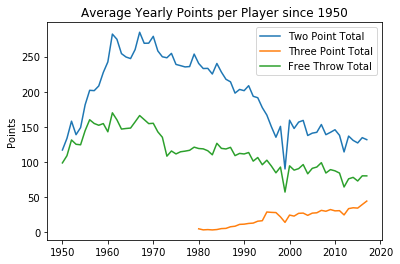

In [10]:
x_axis = year_v
# tot_points, = plt.plot(x_axis, PTS_v, label = "Total Points")
two_points, = plt.plot(x_axis, P2_v, label = "Two Point Total")
three_points, = plt.plot(x_axis, P3_v, label = "Three Point Total")
free_throw, = plt.plot(x_axis, FT_v, label = "Free Throw Total")
# min_played, = plt.plot(x_axis, MP_v, label = "Minutes Played")
plt.ylabel("Points")
plt.title("Average Yearly Points per Player since 1950")
plt.grid
plt.legend(handles=[two_points, three_points, free_throw], loc="best")
plt.savefig("Images/Avg_Yearly_Pts")
plt.show()

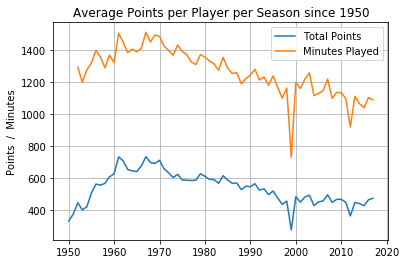

In [18]:
x_axis = year_v
tot_points, = plt.plot(x_axis, PTS_v, label = "Total Points")
min_played, = plt.plot(x_axis, MP_v, label = "Minutes Played")
#games_played, = plt.plot(x_axis, G_v, label = "Games Played")
plt.ylabel("Points  /  Minutes")
plt.title("Average Points per Player per Season since 1950")
plt.grid()
plt.legend(handles=[tot_points, min_played], loc="best")
plt.savefig("Images/Min_Played_vs_Total_Pts")
plt.show()